# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

# I changed the loaded data set to one that is a continuation from q6, but continued with using the sites
# and didn't drop those columns so that could continue my analysis accurately.
df = load_data('data/q6_transformed_data_no_drop_site_or_intervention.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 8328 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [112]:
# TODO: Group by site
groupby_site = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].mean()
print(groupby_site)

              age        bmi  systolic_bp  diastolic_bp
site                                                   
site a  81.300740  26.294371   117.294577     73.548069
site b  80.373164  26.166650   117.248776     73.375612
site c  80.878021  26.299367   117.825086     73.623705
site d  80.559496  26.266509   118.124507     73.781718
site e  80.576331  26.360710   117.474556     73.558580


In [113]:
# TODO: Count by intervention group
groupby_intervention = df.groupby('intervention_group')['patient_id'].count()
print("\n", groupby_intervention)


 intervention_group
control        2808
treatment a    2734
treatment b    2786
Name: patient_id, dtype: int64


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [114]:
# TODO: Use summarize_by_group utility
siteStats = summarize_by_group(df, group_col = "site", agg_dict = {
    'patient_id': 'count',
    'age': ['mean', 'std'],
    'bmi': ['mean', 'std']
})
print("\n", "Site Statistics:")
display(siteStats)


 Site Statistics:


patient_id        age                   bmi          
            count       mean        std       mean       std
site                                                        
site a       2434  81.300740  13.730898  26.294371  3.762968
site b       2042  80.373164  13.426696  26.166650  3.639129
site c       1738  80.878021  13.357149  26.299367  3.726802
site d       1269  80.559496  13.377932  26.266509  3.666040
site e        845  80.576331  13.731098  26.360710  3.605508

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [115]:
# TODO: Multiple aggregations
df_grouped = df.groupby('site')

agg_dict = {'age': ['mean', 'std', 'min', 'max'], 
            'bmi': ['mean', 'std'], 
            'systolic_bp': ['mean', 'median']}

df_grouped = df_grouped.agg(agg_dict)

display(df_grouped)

age                                bmi           systolic_bp  \
             mean        std   min    max       mean       std        mean   
site                                                                         
site a  81.300740  13.730898  44.0  100.0  26.294371  3.762968  117.294577   
site b  80.373164  13.426696  45.0  100.0  26.166650  3.639129  117.248776   
site c  80.878021  13.357149  45.0  100.0  26.299367  3.726802  117.825086   
site d  80.559496  13.377932  45.0  100.0  26.266509  3.666040  118.124507   
site e  80.576331  13.731098  44.0  100.0  26.360710  3.605508  117.474556   

               
       median  
site           
site a  117.0  
site b  117.0  
site c  117.0  
site d  117.0  
site e  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [116]:
# TODO: Intervention group comparisons
# Create aggregation dictionary for multiple metrics
agg_dict = {
    'outcome_cvd': lambda x: (x == 'yes').sum() / len(x) * 100,  # CVD rate
    'adherence_pct': 'mean',                                      # Mean adherence
    'dropout': lambda x: (x == 'yes').sum() / len(x) * 100          # Dropout rate
}

# Apply all aggregations at once
comparison = df.groupby('intervention_group').agg(agg_dict)

# Rename columns for clarity
comparison.columns = ['CVD Rate (%)', 'Mean Adherence (%)', 'Dropout Rate (%)']

print("\nComparative Analysis by Intervention Group:")
print(comparison)

# Also show the crosstab
crosstab = pd.crosstab(df['intervention_group'], df['dropout'])
print("\n\nDropout Crosstab:")
print(crosstab)


Comparative Analysis by Intervention Group:
                    CVD Rate (%)  Mean Adherence (%)  Dropout Rate (%)
intervention_group                                                    
control                33.297721           60.954772         15.669516
treatment a            31.931236           60.321873         14.923189
treatment b            33.560660           61.136037         14.070352


Dropout Crosstab:
dropout               no  yes
intervention_group           
control             2368  440
treatment a         2326  408
treatment b         2394  392


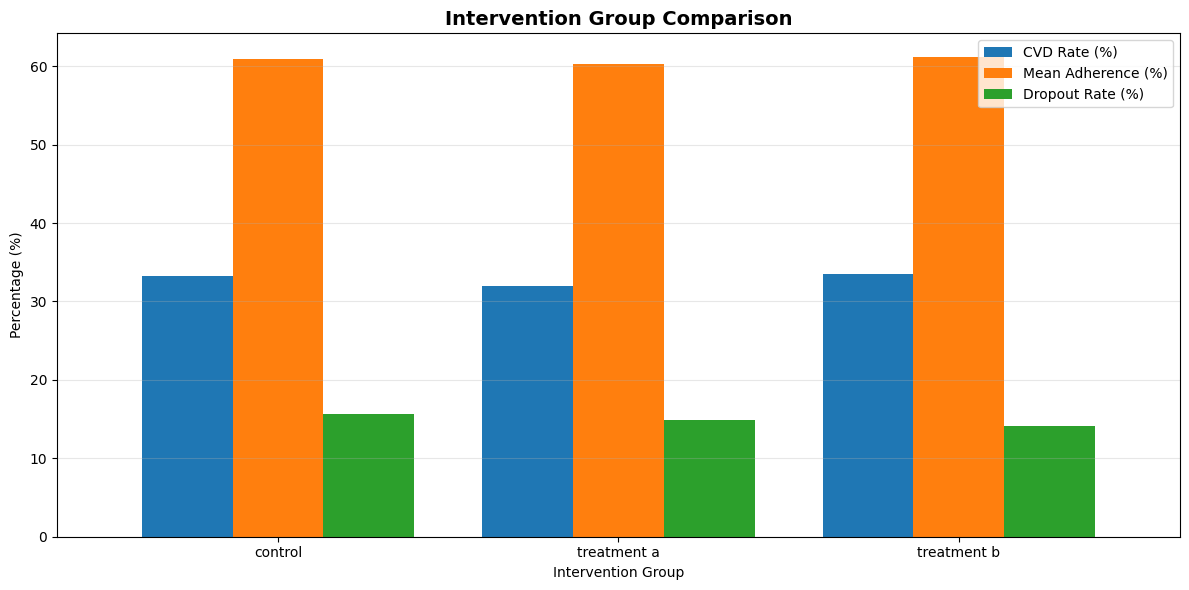

In [117]:
# TODO: Visualization
# Create visualization
comparison.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Intervention Group Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Intervention Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [118]:
# TODO: Save summary outputs
# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 1. Summary statistics by site → `output/q7_site_summary.csv`
siteStats.to_csv('output/q7_site_summary.csv', index=False)

# 2. Intervention group comparison → `output/q7_intervention_comparison.csv`
comparison.to_csv('output/q7_intervention_comparison.csv')

# 3. Text report with key findings → `output/q7_analysis_report.txt`
with open('output/q7_analysis_report.txt', 'w') as report_file:
    report_file.write("Key Findings from Aggregation Analysis\n")
    report_file.write("=======================================\n\n")
    report_file.write("1. Site Summary Statistics:\n")
    report_file.write(siteStats.to_string())
    report_file.write("\n\n2. Intervention Group Comparison:\n")
    report_file.write(comparison.to_string())
    report_file.write("\n\n3. Observations:\n")
    report_file.write("- From site A to site E, the count of patients decreases. Their mean age and BMI remained consistent.\n")
    report_file.write("- The mean adherence and dropout rates stayed very consistent across intervention groups.\n")
    report_file.write("- There was no significant difference in CVD rates across intervention groups.\n")

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. From site A to site E, the count of patients decreases. Their mean age and BMI remained consistent.
2. The mean adherence and dropout rates stayed very consistent across intervention groups.
3. There was no significant difference in CVD rates across intervention groups.